# EDA for the Bachelorette Predictor
### Kwame V. Taylor

I will perform Exploratory Data Analysis on my joined and cleaned Bachelorette contestant data here.

## Set up Environment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import matplotlib as mpl

from cycler import cycler
import seaborn as sns

# default viz size settings
plt.rc('figure', figsize=(12, 8))
plt.rc('font', size=15)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
mpl.rcParams['axes.prop_cycle'] = cycler(color=['deepskyblue', 'firebrick', 'darkseagreen', 'violet'])

import warnings
warnings.filterwarnings("ignore")

In [2]:
from wrangle import acquire_data, join_dfs, drop_extra_cols
from preprocessing import handle_dates_and_elims, train_validate_test

## Wrangle the Data

In [3]:
df, join = acquire_data()
df = join_dfs(df, join)
df = drop_extra_cols(df)

In [4]:
df.head()

,Age,ElimWeek,Season,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10
CONTESTANT,,,,,,,,,,,,
1_RYAN_S,29,NaN,1,D14,D1,D1,D1,D1,NaN,NaN,NaN,NaN
1_CHARLIE_M,28,6.0,1,D14,D1,D1,D1,D1,NaN,NaN,NaN,NaN
1_RUSS_X,30,5.0,1,D14,D1,D1,D1,NaN,NaN,NaN,NaN,NaN
1_GREG_T,28,4.0,1,D14,D5,D1,NaN,NaN,NaN,NaN,NaN,NaN
1_BOB_G,31,3.0,1,D14,D5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

Age           0
ElimWeek      9
Season        0
DATES-2     109
DATES-3     135
DATES-4     159
DATES-5     174
DATES-6     198
DATES-7     215
DATES-8     232
DATES-9     244
DATES-10    253
dtype: int64

## Preprocessing

In [6]:
df = handle_dates_and_elims(df)
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = train_validate_test(df, 'ElimWeek')

Shape of train: (147, 4) | Shape of validate: (64, 4) | Shape of test: (53, 4)


In [7]:
X_train.head(3)

,Age,Season,One-on-One_Score,FirstDate
CONTESTANT,,,,
2_RYAN_M,30,2,0.178571,1.0
5_ADAM_D,27,5,0.000000,0.0
4_GRAHAM_B,29,4,0.359524,1.0


In [8]:
y_train.head(3)

CONTESTANT
2_RYAN_M      4.0
5_ADAM_D      1.0
4_GRAHAM_B    6.0
Name: ElimWeek, dtype: float64

## Exploratory Data Analysis

Text(0.5, 1.0, 'Which contestants lasted more weeks, by season and age?')

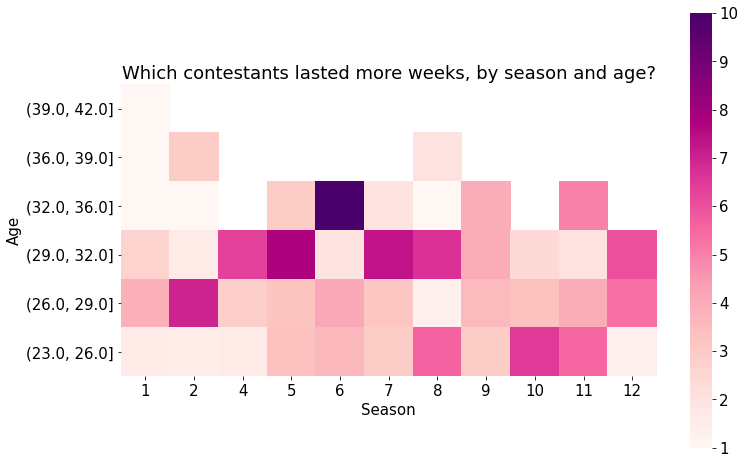

In [9]:
heatmap1_data = pd.pivot_table(train, values='ElimWeek', 
                     index=pd.cut(train['Age'], bins=6, precision=0), 
                     columns='Season')
heatmap1_data.sort_index(inplace=True, ascending=False)
sns.heatmap(heatmap1_data, cmap="RdPu", square=True)
plt.title('Which contestants lasted more weeks, by season and age?')